In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
%run imports.py

In [18]:
import envpool

In [46]:
env1 = envpool.make_gymnasium('Breakout-v5', num_envs=64, stack_num=1)
env1.reset();

t0 = time.time()
for i in tqdm(range(1000)):
    env1.step(np.random.randint(0, 18, size=64))
t1 = time.time()
print((1000*64)/(t1-t0), 'SPS')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.71it/s]

7018.495659709626 SPS


In [73]:
env = make_env(n_envs=64)
env.reset();

envpool found!


In [74]:
buffer = Buffer(256, 64, env, device='cpu')
agent = RandomAgent(18)

KeyError: 'obs'

In [ ]:
%%time
buffer.collect(agent, 4)

In [69]:
%%time
for i in range(256):
    env.step(np.random.randint(0, 18, size=64))

CPU times: user 44.3 s, sys: 210 ms, total: 44.5 s
Wall time: 3.4 s


In [72]:
%%time
for i in range(256):
    env1.step(np.random.randint(0, 18, size=64))

CPU times: user 32.2 s, sys: 81.1 ms, total: 32.3 s
Wall time: 2.25 s


In [77]:
env = envpool.make_gymnasium('Breakout-v5', num_envs=64, stack_num=1)
env.observation_space = None

AttributeError: property 'observation_space' of 'AtariGymnasiumEnvPool' object has no setter

In [23]:
%%time
def make_env_single(env_id="Breakout", frame_stack=4):
    env = gym.make(f"ALE/{env_id}-v5", frameskip=1, full_action_space=True)
    # TODO: reduce space of actions
    env = gym.wrappers.AtariPreprocessing(env, terminal_on_life_loss=True)
    env = gym.wrappers.FrameStack(env, num_stack=frame_stack)
    return env
make_fn = partial(make_env_single, env_id='Breakout', frame_stack=4)
make_fns = [make_fn for _ in range(64)]
env2 = gym.vector.SyncVectorEnv(make_fns)

CPU times: user 12.5 s, sys: 88.1 ms, total: 12.6 s
Wall time: 12.6 s


In [24]:
%%time
env2.reset()
for i in tqdm(range(1000)):
    env2.step(np.random.randint(0, 15, size=64))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:43<00:00,  9.66it/s]

CPU times: user 1min 44s, sys: 171 ms, total: 1min 44s
Wall time: 1min 44s


In [6]:
%%time
env1 = envpool.make('Breakout-v5', env_type='gym', num_envs=256, stack_num=4, batch_size=64, num_threads=64)

CPU times: user 1min 33s, sys: 211 ms, total: 1min 33s
Wall time: 2.76 s


In [ ]:
%%time
env1.reset()
for i in tqdm(range(1000)):
    env1.step(np.random.randint(0, 15, size=64))
    

  0%|                                                                                                                                                                                                                       | 0/1000 [00:00<?, ?it/s]

In [31]:
2048*512*84*84/1e9

7.398752256

In [47]:
torch.arange(64)%32

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  0,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [17]:
env1 = envpool.make('Breakout-v5', env_type='gym', num_envs=8, stack_num=4, seed=0,
                    noop_max=30, episodic_life=False, full_action_space=True, use_fire_reset=False, )
obs = env1.reset()



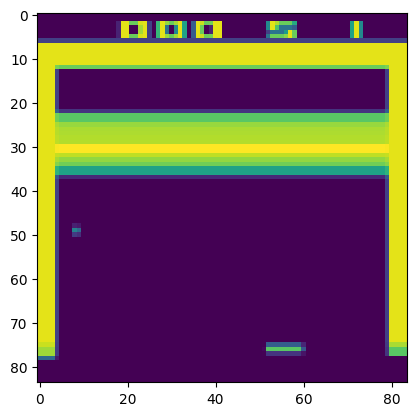

In [23]:
plt.imshow(obs[0, -1])

In [ ]:
episodic_life (bool): make end-of-life == end-of-episode, but only reset on true game over. It helps the value estimation. Default to False;
zero_discount_on_life_loss (bool): when the agent losses a life, the discount in dm_env.TimeStep is set to 0. This option doesn’t affect gym’s behavior (since there is no discount field in gym’s API). Default to False;
reward_clip (bool): whether to change the reward to sign(reward), default to False;
repeat_action_probability (float): the action repeat probability in ALE configuration, default to 0 (no action repeat to perform deterministic result);
use_inter_area_resize (bool): whether to use cv::INTER_AREA for image resize, default to True.

In [50]:
envs = []
for i in tqdm(range(10)):
    env = envpool.make('Breakout-v5', env_type='gym', num_envs=8, stack_num=4)
    envs.append(env)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.34it/s]


In [1]:
import train_dt2

/data/vision/phillipi/akumar01/miniconda3/envs/egb/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
args = train_dt2.parse_args('--device cuda'.split())
print(args)

Namespace(batch_size=1024, collect_size=8192, ctx_len=4, device='cpu', ent_coef=0.01, entity=None, env_id='Pong', frame_stack=4, freq_collect=10, gamma=0.99, load_agent=None, log_video=False, lr=0.0006, lr_min=6e-05, lr_schedule=True, max_grad_norm=0.5, n_envs=64, n_iters=1000, n_steps=128, name=None, obj='ext', project=None, save_agent=None, seed=0, torch_deterministic=True, track=False)


In [ ]:
train_dt2.main(args)

Printing DTGPT Summary...
125571
num decayed parameter tensors: 12, with 125,312 parameters
num non-decayed parameter tensors: 10, with 259 parameters
using fused AdamW: False


A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
  0%|                                                                                                                                                                                                                       | 0/1000 [00:00<?, ?it/s]

collect: dt_const=0.083, dt_inf=0.317, dt_env=0.989
collect: dt_const=0.037, dt_inf=0.247, dt_env=0.952
collect: dt_const=0.031, dt_inf=0.238, dt_env=0.760
collect: dt_const=0.031, dt_inf=0.238, dt_env=0.818


In [1]:
from collections import deque

In [3]:
d = deque(maxlen=10)

In [4]:
for i in range(20):
    d.append(i)
    print(d)

deque([0], maxlen=10)
deque([0, 1], maxlen=10)
deque([0, 1, 2], maxlen=10)
deque([0, 1, 2, 3], maxlen=10)
deque([0, 1, 2, 3, 4], maxlen=10)
deque([0, 1, 2, 3, 4, 5], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)
deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], maxlen=10)
deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], maxlen=10)
deque([3, 4, 5, 6, 7, 8, 9, 10, 11, 12], maxlen=10)
deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13], maxlen=10)
deque([5, 6, 7, 8, 9, 10, 11, 12, 13, 14], maxlen=10)
deque([6, 7, 8, 9, 10, 11, 12, 13, 14, 15], maxlen=10)
deque([7, 8, 9, 10, 11, 12, 13, 14, 15, 16], maxlen=10)
deque([8, 9, 10, 11, 12, 13, 14, 15, 16, 17], maxlen=10)
deque([9, 10, 11, 12, 13, 14, 15, 16, 17, 18], maxlen=10)
deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], maxlen=10)


In [48]:
import time
from contextlib import contextmanager
from collections import defaultdict

class Timer:
    def __init__(self):
        self.times = defaultdict(float)
        
    @contextmanager
    def time(self, key):
        before = time.time()
        yield None
        time.time()
        self.times[key] += (time.time()-before)
        
    
timer = Timer()
with timer.time('env') as f:
    print(f)
    time.sleep(1.)
    print('lalalla')

None
lalalla


In [49]:
timer.times

defaultdict(float, {'env': 1.0024609565734863})

In [65]:
deque

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])